In [44]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans



In [4]:
df = pd.read_csv('winequality-red.csv')

In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [10]:
#Normalizamos los datos 
df_norm = (df-df.min())/(df.max()-df.min())

df_norm.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.329171,0.279329,0.270976,0.112247,0.125988,0.209506,0.142996,0.490211,0.449695,0.196496,0.311228,0.527205
std,0.154079,0.122644,0.194801,0.096570,0.078573,0.147326,0.116238,0.138571,0.121564,0.101501,0.163949,0.161514
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.221239,0.184932,0.090000,0.068493,0.096828,0.084507,0.056537,0.406021,0.370079,0.131737,0.169231,0.400000
50%,0.292035,0.273973,0.260000,0.089041,0.111853,0.183099,0.113074,0.490455,0.448819,0.173653,0.276923,0.600000
75%,0.407080,0.356164,0.420000,0.116438,0.130217,0.281690,0.197880,0.570117,0.519685,0.239521,0.415385,0.600000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [59]:
#Busqueda de clustering, calcularemos que tan similares son los productos dentro de los cluster 

wcss = [] #Lista vacia

for i in range (1,11): 
    kmeans = KMeans(n_clusters = 1, max_iter = 300) #Creamos un modelo de Kmeans 
    kmeans.fit(df_norm) #Guardamos y aplicamos el modelo 
    wcss.append(kmeans.inertia_) #Agregamos el modelo a la variable donde se encuentra en inertia_ dentro de Kmeans 

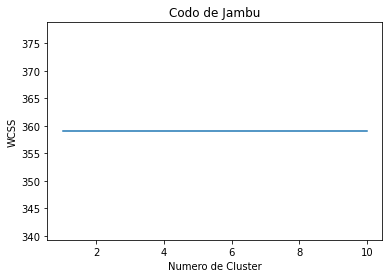

In [60]:
plt.plot(range(1,11),wcss)
plt.title('Codo de Jambu')
plt.xlabel('Numero de Cluster')
plt.ylabel('WCSS') #Es un indicador de que tal similares son los productos de los cluster 
plt.show()

In [22]:
#Aplicar el modelo de Kmeans  

clustering = KMeans(n_clusters = 3, max_iter = 300) #creamos el modelo 
clustering.fit(df_norm) #aplicamos el modelos

KMeans(n_clusters=3)

In [24]:
#Agregamos la clasificacion al archivo original 

df['KMeans_Clusters'] = clustering.labels_ #Los resultados se guardan en labers en el modelo 

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,KMeans_Clusters
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2


In [61]:
#Visualizacion de cluster que se formaron 

from sklearn.decomposition import PCA 

PCA = PCA(n_components = 2) # dos componentes principales 
PCA_DF = PCA.fit_transform(df_norm) #Obtenemos los componentes del modelo que creeamos 
PCA_DF_DT = pd.DataFrame(data = PCA_DF,columns = ['Componente_1','Componente_2']) #Creamos el dataframe
PCA_NOMBRES = pd.concat([PCA_DF_DT, df['KMeans_Clusters']], axis=1) # =Unir columnas 
PCA_NOMBRES 

,Componente_1,Componente_2,KMeans_Clusters
0,-0.308010,-0.198750,2
1,-0.265056,-0.237308,2
2,-0.222379,-0.191181,2
3,0.424268,-0.057361,0
4,-0.308010,-0.198750,2
...,...,...,...
1594,-0.353614,-0.020534,2
1595,-0.315667,0.163685,1
1596,-0.221657,0.139932,1
1597,-0.356954,-0.047596,2


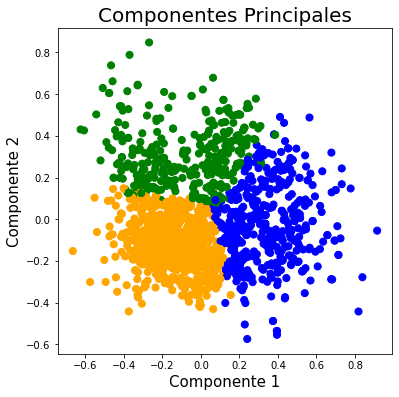

In [62]:
#Lo graficamos 

fig = plt.figure(figsize = (6,6))

ax = fig.add_subplot(1,1,1) #creamos un grafico dentro de la figura
ax.set_xlabel('Componente 1', fontsize = 15)
ax.set_ylabel('Componente 2', fontsize = 15)
ax.set_title('Componentes Principales',fontsize = 20)

color_theme = np.array(["blue","green","orange"])
ax.scatter(x = PCA_NOMBRES.Componente_1, y = PCA_NOMBRES.Componente_2, c= color_theme[PCA_NOMBRES.KMeans_Clusters], s = 50)
plt.show() 

#s es tamano de los puntos 
